In [10]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, max_epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.C = C  
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Training the SVM using gradient descent
        for epoch in range(self.max_epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (
                        2 * self.C * self.weights - np.dot(x_i, y[idx])
                    )
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)

# Create synthetic data
X = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])
#z = np.array([1,2,3,4,5])
#z = np.array([[1,2,3,4,5]])
# Initialize and train the SVM
svm = LinearSVM()
svm.fit(X, y)

# Test data
#test_data = np.array([[4, 5], [2, 2]])
test_data = np.array([[[4, 7]]])

# Make predictions
predictions = svm.predict(test_data)

print("Predictions:", predictions)


Predictions: [[-1.]]


Sure, let's break down the training process of the SVM using gradient descent in a more casual manner:

1. **Loop over epochs**:
   The training process iterates for a specified number of epochs. During each epoch, the model tries to update its parameters to minimize the loss function.

2. **Loop over training samples**:
   Within each epoch, the training samples are iterated over. For each sample, the model computes a condition based on whether the sample is correctly classified or not.

3. **Update weights and bias**:
   - If the condition is satisfied (meaning the sample is correctly classified), the model updates the weights using a derivative term that only considers the regularization to maintain its magnitude.
   
   - If the condition is not satisfied (meaning the sample is misclassified), the model updates the weights and bias using derivatives of both the regularization term and the dot product of the sample features and its class label. This update pushes the decision boundary towards correctly classified samples and away from misclassified ones.

4. **Explanation**:
   - By iteratively updating the weights and bias using gradient descent, the model aims to find the optimal parameters that minimize the loss function.
   - The regularization term helps prevent overfitting by penalizing large weights.
   - The goal is to find the decision boundary that best separates the classes by maximizing the margin between them.

In summary, this training process updates the SVM's parameters iteratively using gradient descent, based on whether each training sample is correctly classified or not, aiming to find the decision boundary that best separates the classes.

Sure, here's the explanation without LaTeX:

1. **Hinge Loss Function**:
   The hinge loss function is commonly used in SVMs for classification tasks. For each training sample \( (x_i, y_i) \), where \( x_i \) is the feature vector and \( y_i \) is the class label (-1 or 1), the hinge loss is defined as:

   - \( L_i = \max(0, 1 - y_i(w^T x_i + b)) \)
   
   Here,
   - \( w \) is the weight vector.
   - \( b \) is the bias term.
   - \( w^T x_i + b \) is the decision function output for the \( i^{th} \) sample.
   - \( y_i(w^T x_i + b) \) represents the margin, where positive values indicate correct classification (inside the margin), and negative values indicate misclassification.

2. **Regularization Term**:
   The regularization term penalizes large values of the weights to prevent overfitting. In the case of SVMs, \( L2 \) regularization is commonly used, which adds a penalty term to the loss function. The regularized hinge loss is given by:

   - \( L = \frac{1}{N} \sum_{i=1}^{N} L_i + \lambda ||w||^2 \)
   
   Here,
   - \( N \) is the number of training samples.
   - \( \lambda \) is the regularization parameter.
   - \( ||w||^2 \) is the squared \( L2 \) norm of the weight vector \( w \).

3. **Gradient Descent**:
   Gradient descent is used to minimize the loss function by updating the weights and bias in the opposite direction of the gradient. The update rule for the weights \( w \) and bias \( b \) is given by:

   - \( w = w - \eta \frac{\partial L}{\partial w} \)
   - \( b = b - \eta \frac{\partial L}{\partial b} \)
   
   Here,
   - \( \eta \) is the learning rate.
   - \( \frac{\partial L}{\partial w} \) and \( \frac{\partial L}{\partial b} \) are the gradients of the loss function with respect to the weights and bias, respectively.

4. **Implementation**:
   The implementation in the code computes the gradient of the hinge loss function with respect to the weights and bias. It then updates the weights and bias using the gradient descent update rule, considering the hinge loss and the regularization term.

In summary, the `fit` method of the `LinearSVM` class implements the training of the SVM using gradient descent, updating the weights and bias based on the hinge loss function and the specified regularization parameter to find the optimal decision boundary separating the classes.

Accuracy: 1.00


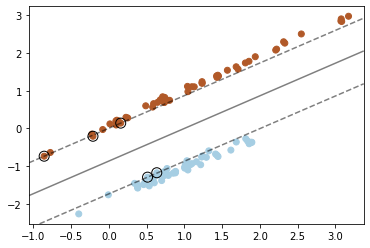

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary and data points
def plot_decision_boundary(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='k')
    plt.show()

plot_decision_boundary(svm_classifier, X, y)


In [1]:
from sklearn.svm import SVR

In [2]:
model = SVR()

In [ ]:
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
